<a href="https://colab.research.google.com/github/david-adewoyin/machine_learning_basics/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ridge Regression
### Python Implementation of Ridge Regression from scratch
**Ridge Regression** (also called *Tikhonov regularization* or *L2 regularization*) is a regularized version of the linear regression in which the we try to account for overfitting by forcing the learning algorithm to keep the weights of our model as small as possible.



### Notation and Definitions:  
- $y:   $    target value. 
- $\lambda:$ regularization hyperparameter
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\alpha:$ is the learning rate which determmines the step size at each iteration
- $\boldsymbol{w},b :   $ are the parameters of the algorithm
- $f_{\boldsymbol{w},b}(x^{(i)}):  $ is our prediction for example $i$ using parameters $\boldsymbol{w},b$.
- $\boldsymbol{D} = \{{\boldsymbol{(x^{(1)}},y^{(1)})},...,\boldsymbol{(x^{(n)}},y^{(n)})\}$: is the set of n training examples, where:
    - $\boldsymbol{(x^{(i)}}) $ is the $d$ dimensional input vector ;being the feature vector consisting of$ (x_1,x_2, ...x_d)$ of the training example $\boldsymbol{i}$ 
    - $y^{(i)}$ is the desired output value for that input vector
- $(\boldsymbol{x^{(i)}},y^{(i)})$: an instance of a training example.

#### $\lambda$ hyperparameter
$\lambda $ is an hyperparameter that determines how much we want to regularize the model, higher values means more penalty which in turn causes the weights value chosen to be small and smaller values in $\lambda$ reduces the effect of regularization with $\lambda = 0$ meaning not to regularize the model.  
  
  <figure style="margin-left:auto;margin-right:auto;text-align:center">
    <br><br>
 <img src="images/ridge_regression.png" width ='500px'><br>
       <cite style='text-align:center'>Hands-on Machine Learning with Scikit-Learn, Keras, andTensorFlow</cite><br>
    <br></figure>
  
### Training 
Training ridge regression is similar to the linear regression except with a regularizion term added to the cost function.  
Ridge Regression model can also be trained using :  
- Gradient Descent or
- The normal equation (closed form solution) having the form $ \boldsymbol{w}=(X^{T}X + \lambda \boldsymbol{A})^{-1}X^Ty $    
Where $\boldsymbol{X}$ is the matrix of all the input features of the training examples.  
and **A** is the $(n-1) * (n+1) $ identity matrix.
Unlike other types of regularization such as the Lasso regularization, the ridge regression has a closed form solution and a optimal solution.

#### Gradient Descent Algorithm

- We added an additional term at the end of the cost function to be minimized

$$
J(w,b)=\frac{1}{2m} \sum\limits_{i=1}^{m}=(f_{w,b}(x^{(i)}) - y^{(i)})^2 + \frac{1}{2m}\lambda\sum\limits_{j=1}^{n}w_j^2
$$  
Computing the partial derivatives of the weights and biases equals :

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$



In [1]:
## Importing required modules
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(126)

In [2]:
## Creating a simple training set
X,y=make_regression(1000,n_features=6,noise=5)

In [3]:
## Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8)

In [4]:
# X_train has 5 features and 700 examples
print(f" the shape of X_train is {X_train.shape}")

 the shape of X_train is (200, 6)


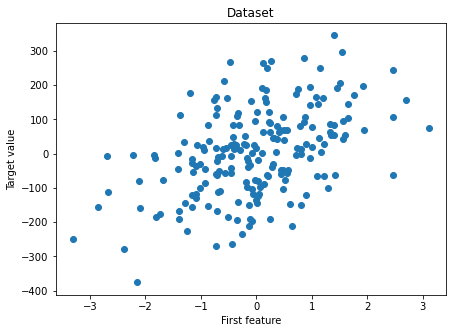

In [5]:
# Visualizing y_train against the first feature of X_train
fig=plt.figure(figsize=(7,5))
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Target value")
plt.scatter(X_train[:,0],y_train)

In [37]:
class RidgeRegression:
    """
        Trains a ridge regression model using gradient descent
        """
    def __init__(self, lambda_ = 0,n_iter=1_000,learning_rate=0.001,verbose=False):
        self.lambda_ = lambda_
        self.n_iter= n_iter
        self.learning_rate = learning_rate
        self.verbose = verbose
    
    def predict(self,X):
        return np.dot(self.w,X.T) + self.b
    
    def fit(self,X,y):
        
        m_rows,n_features  = X.shape # (number of examples, number of features )

        ## initialize  the set of weights and bias to some random value
        self.w = np.zeros((n_features,))
        self.b = 0
        costs= []
        
        for i in range(self.n_iter):
            dj_dw,dj_db = self._gradient(X,y)
            self.w = self.w -  self.learning_rate * dj_dw
            self.b = self.b -  self.learning_rate * dj_db
            
            y_hat = self.predict(X)
            cost = self._cost_function(y_hat,y,n_features)
            costs.append(cost)
            
            if self.verbose and i % 500 == 0 : # print out the value of our costs function at every 500 iterations
                print(f"Cost as iteration {i}: {cost}")
                
    def fit_normal(self,X,y):
        X_trans_x= np.dot(X.T,X)
        t = np.eye(X_trans_x.shape[0])
        t=  X_trans_x + self.lambda_ * t
        temp =  np.linalg.inv(t)
        self.w = np.dot(np.dot(temp,X.T),y)
        self.b = 0
    def _gradient(self,X,y):
        m_rows,n_features  = X.shape # (number of examples, number of features )
        dj_dw = np.zeros((n_features,))
        dj_db = 0
        
        err = (np.dot(self.w,X.T) + self.b) - y
        
        for i in range(n_features):
            dj_dw[i] = np.sum( err * X[:,i])
        dj_db = np.sum(err)
        dj_dw = dj_dw/ m_rows
        dj_db = dj_db/ m_rows
        
        for j in range(n_features):
            if(self.lambda_ == 0):
                break
            reg = (self.lambda_/ m_rows) *self. w[j]
            dj_dw[j] = dj_dw[j] + reg

        return (dj_dw,dj_db)
           
    def _cost_function(self,y_hat,y,n_features):
        m_rows = y.shape[0]
        cost = np.sum(np.square(y_hat - y)) / (2*m_rows)
        
        reg_cost = 0
        for j in range(n_features):
            if(self.lambda_ == 0):
                break
            reg_cost += (self.w[j] ** 2)
            reg_cost += (self.lambda_/(2*n_features))*reg_cost

        return cost + reg_cost

In [38]:
ridge= RidgeRegression(lambda_=100)
ridge.fit_normal(X_train_poly,y_train)

In [40]:
t = ridge.predict(X_train_poly)
np.sqrt(mean_squared_error(y_train,t))

26.190806904819212

## Creating a linear model
To see the impact of regularization we first create a polynomial model with 10 degree of polynomial

In [7]:
transformer = PolynomialFeatures(4)
X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)

print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_train_poly is {X_train_poly.shape}")

The shape of X_train is (200, 6)
The shape of X_train_poly is (200, 210)


In [8]:
lin_model = LinearRegression()
lin_model.fit(X_train_poly,y_train)

LinearRegression()

In [9]:
poly_train_pred = lin_model.predict(X_train_poly)
poly_train_error = np.sqrt(mean_squared_error(y_train,poly_train_pred))

poly_test_pred = lin_model.predict(X_test_poly)
poly_test_error = np.sqrt(mean_squared_error(y_test,poly_test_pred))

print(f"Our training error is :{poly_train_error :.3f}")
print(f"Our testing error is :{poly_test_error :.3f}")

Our training error is :0.000
Our testing error is :179.484


## Resulting of the Polynomial Model
The polynomial model of 10 degree achieve a training error of `0` but has a very high error on the test showing the effect of overfitting the training data  
Now We turn our attention to using ridge regression to solve the problem of overfitting.
## using Ridge Regression
We are going to be using the sklearn implementation of ridge regression which is based on the closed form solution for stability

In [10]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge(alpha=100)
ridge.fit(X_train_poly,y_train)

Ridge(alpha=100)

In [12]:
train_pred =ridge.predict(X_train_poly)
train_error = np.sqrt(mean_squared_error(y_train,train_pred))

test_pred = ridge.predict(X_test_poly)
test_error = np.sqrt(mean_squared_error(y_test,test_pred))

print(f"Our training error using ridge regression is :{train_error :.3f}")
print(f"Our test error using ridge regression is :{test_error :.3f}")

Our training error using ridge regression is :26.172
Our test error using ridge regression is :77.595


### Comparing the test  error of ridge regression with the linear regression shows a lower value